In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import math
import random

There are *m* total car families, and *n* cars in each family

In [ ]:
alpha=7.5 #degrees

a=1.0
b=4.0
c=0.3

H1=1.6
H2=1.2
H3=0.7

m=5
n=4

start=0
end = 40
num = 100
t_s = np.linspace(start,end,num)
w1 = -2*np.pi/14
w21 = 2*np.pi/5

In [ ]:
def w32(t):
  return 3.0*np.sin(w1*t)
def theta1(t,i):
  return (2*np.pi*i/m)+float(w1*t)
def theta2(t,j):
  return (2*np.pi*j/n)+(w1+w21)*t
def theta3(t,j):
  return theta2(t,j)+ (3.0/w1)*(1-np.cos(w1*t))

##Trajectory in cartesian plane
Using some trigonometry to find the X and Y coordinates as a function of the angular displacements

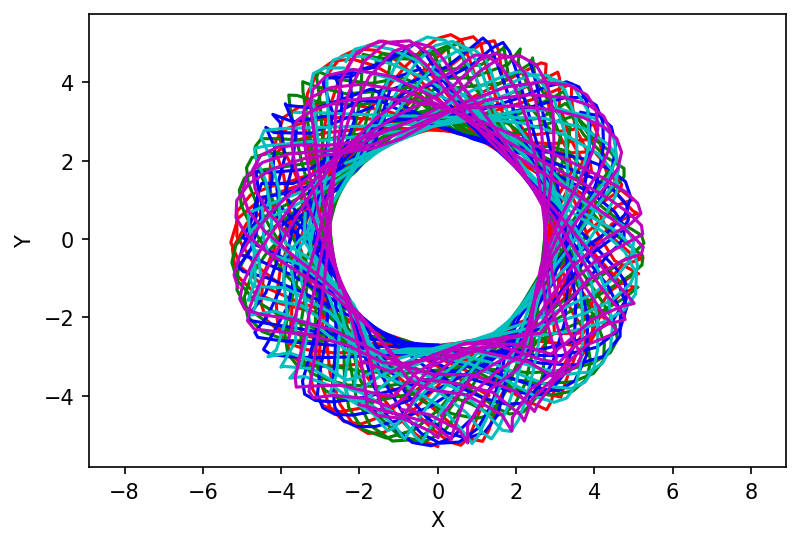

In [ ]:
X = [[  [b*np.sin(theta1(t,i))+a*np.sin(theta2(t,j))+c*np.sin(theta3(t,j)) for t in t_s] for j in range(n)] for i in range(m)]
Y = [[  [-1*b*np.cos(theta1(t,i))-a*np.cos(theta2(t,j))-c*np.cos(theta3(t,j)) for t in t_s] for j in range(n)] for i in range(m)]
color = ['r-','g-','b-','c-','m-']

plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
for i in range(m):
  for j in range(n):
    plt.plot(X[i][j], Y[i][j], color[i])

###The above plot shows the trajectories of all the cars in the ride. Note that for each car "family" the same color is used for better visualisation.

###Position vector of bottom point (where motor is attached) wrt (X,Y)

In [ ]:
r_x = [[  [-1*c*np.sin(theta3(t,j)) for t in t_s] for j in range(n)] for i in range(m)]
r_y = [[  [c*np.cos(theta3(t,j)) for t in t_s] for j in range(n)] for i in range(m)]
r_z = [[  [-1*H3 for t in t_s] for j in range(n)] for i in range(m)]

##Velocity plot $V_y$ v/s $V_x$

In [ ]:
Vx=[[[0]*(num-1) for j in range(n)] for i in range(m)]
Vy=[[[0]*(num-1) for j in range(n)] for i in range(m)]
dt = (end-start)/num

for i in range(m):
  for j in range(n):
    for k in range(num-1):
      Vx[i][j][k] = ( X[i][j][k+1]-X[i][j][k] ) / dt
      Vy[i][j][k] = ( Y[i][j][k+1]-Y[i][j][k] ) / dt

##Speed vs time plot for a single family

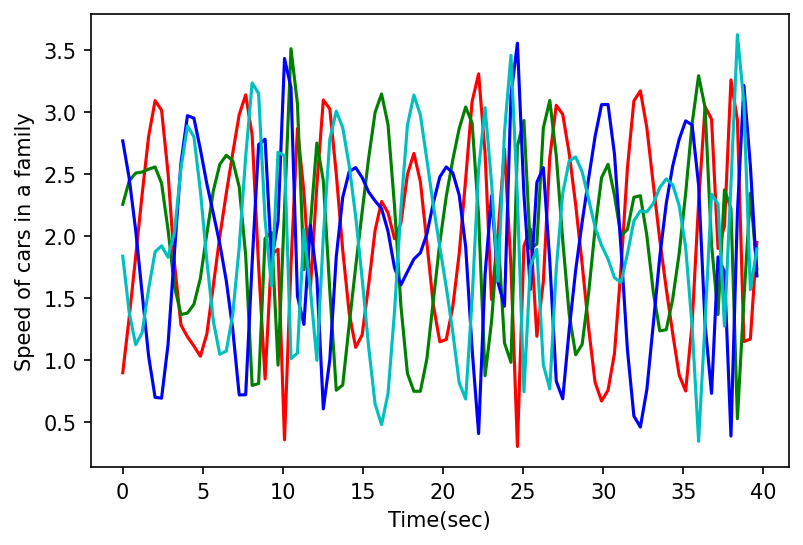

In [ ]:
plt.xlabel("Time(sec)")
plt.ylabel("Speed of cars in a family")
speed = [   [(Vx[0][j][i]**2 + Vy[0][j][i]**2) ** 0.5 for i in range(num-1)] for j in range(n)    ] 

for i in range(n):
  plt.plot(t_s[:-1],speed[i], color[i])

###We could also plot the rate of change of radial distance from the centre, i.e. 
$\frac{d|\vec{r}|}{dt}$ = $\frac{d \sqrt{x^2+y^2}}{dt}$ = $\frac{x \cdot \dot x}{r} + \frac{y \cdot \dot y}{r}$

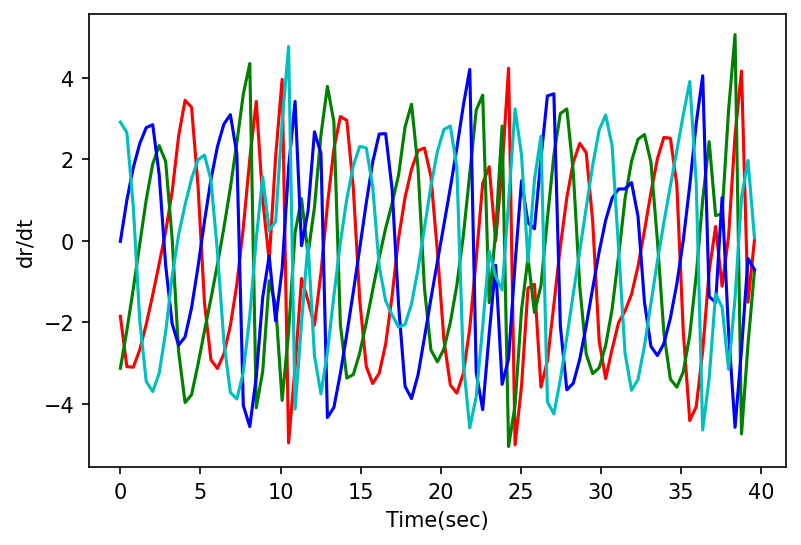

In [ ]:
plt.ylabel("dr/dt")
plt.xlabel("Time(sec)")
##Only for the first family
radial_speed = [[0]*(num-1) for i in range(n)]
for i in range(n):
  for j in range(num-1):
    r = (Vx[0][i][j]**2 + Vy[0][i][j]**2) ** 0.5
    radial_speed[i][j] = (X[0][i][j]*Vx[0][i][j]/r) +   (Y[0][i][j]*Vy[0][i][j]/r)
  plt.plot(t_s[:-1], radial_speed[i], color[i])

##Acceleration

In [ ]:
a_x=[[[0]*(num-2) for j in range(n)] for i in range(m)]
a_y=[[[0]*(num-2) for j in range(n)] for i in range(m)]

for i in range(m):
  for j in range(n):
    for k in range(num-2):
      a_x[i][j][k] = ( Vx[i][j][k+1]-Vx[i][j][k] ) / dt
      a_y[i][j][k] = ( Vy[i][j][k+1]-Vy[i][j][k] ) / dt


##Acceleration magnitude vs time for a single family of cars

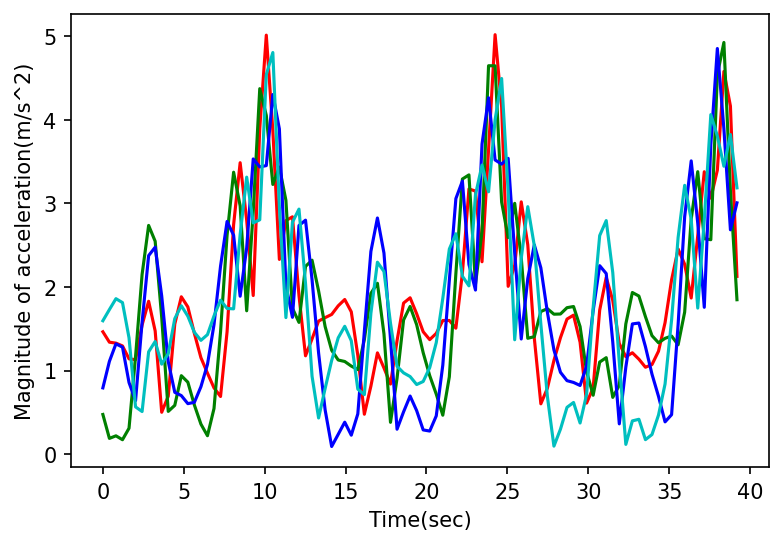

In [ ]:
plt.xlabel("Time(sec)")
plt.ylabel("Magnitude of acceleration(m/s^2)")
accln = [   [(a_x[0][j][i]**2 + a_y[0][j][i]**2) ** 0.5 for i in range(num-2)] for j in range(n)    ] 

for i in range(n):
  plt.plot(t_s[:-2],accln[i], color[i])

###Things go pretty optimistic from here. We have the values of acceleration of the cars at each time stamp. This is suggesting us to go for Force analysis now!

##Joint reaction analysis
By force balance, we can easily find the expression for $N_x$ and $N_y$ given by \
the joint where each car is attached. We get: \
$\vec{F}_{reaction} + \vec{F}_{g} +\vec{F}_{damping}=M \cdot \vec{a}$ \
Where, $\vec{F}_{damping} = -c\cdot \vec{v} $ \
Thus, \
$N_x = M\cdot a_x + c \cdot v_x$, and \
$N_y = M\cdot a_y + c \cdot v_y + M\cdot g\cdot sin\alpha$ \
Exactly same expressions are found when solved using the lagrange's approach. \
Take generalised coordinates for the (Car+Human) system: $\{x,y,\theta_3\}$ \
$T = \tfrac{1}{2} \cdot M \cdot (v_x^2 + v_y^2) + \tfrac{1}{2}\cdot I_{CM}\cdot \ddot{\theta_3}^2$, where $M=M_{car}+M_{human}$ \
$V = M\cdot g \cdot y sin\alpha$ \
$L=T-V$ \
$\delta W^{nc} = Q_x^{nc}\cdot \delta x+Q_y^{nc}\cdot \delta y+Q_{\theta_3}^{nc}\cdot \delta \theta_3$ \
$Q_x^{nc} = N_x - c \cdot v_x = M\cdot a_x$ \
$Q_y^{nc} = N_y - c \cdot v_y = M\cdot a_y + M\cdot gsin\alpha$ \
$Q_{\theta_3}^{nc} = [I_{cm}]\cdot \ddot{\theta_3}=\vec{M_{ext}}+\vec{\tau_{N}}$



In [ ]:
c = 0.5
M_human = 80
g=9.81
sigma_car = 45 #kg / m^2

Area = 2 * (H1*H2+H2*H3+H3*H1) - H2*H1/2
M_car = sigma_car*Area
M = M_human + M_car

# For the first family, we have:
N_x=[[0]*(num-2) for j in range(n)] 
N_y=[[0]*(num-2) for j in range(n)]

###Calculate reaction forces (for the first family)

In [ ]:
for i in range(n):
  for j in range(num-2):
    N_x[i][j] = M*a_x[0][i][j] + c*Vx[0][i][j]
    N_y[i][j] = M*a_y[0][i][j] + c*Vy[0][i][j] + M*g*np.sin(alpha*np.pi/180)


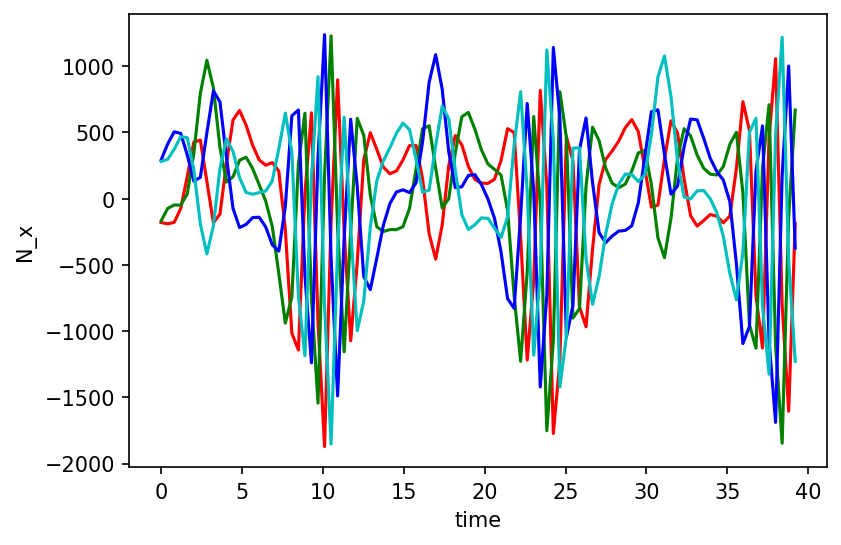

In [ ]:
plt.xlabel("time")
plt.ylabel("N_x")
for i in range(n):
  plt.plot(t_s[:-2],N_x[i], color[i])

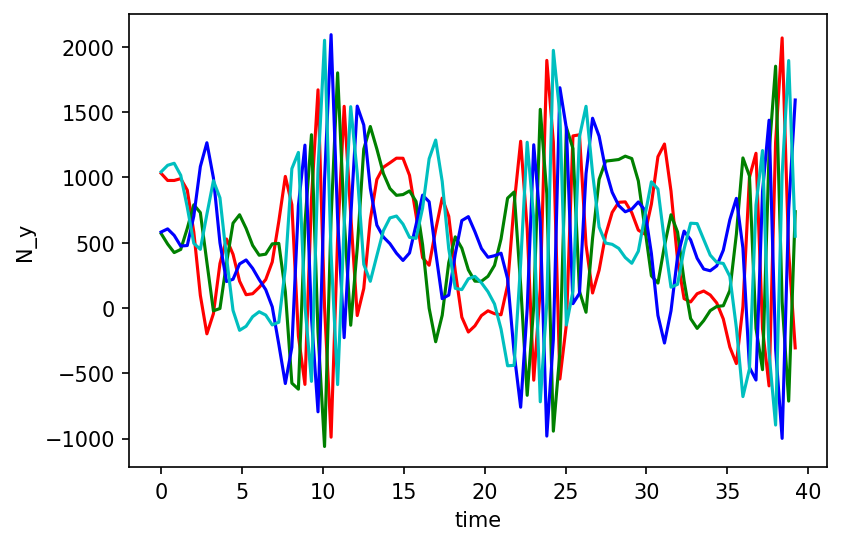

In [ ]:
plt.xlabel("time")
plt.ylabel("N_y")
for i in range(n):
  plt.plot(t_s[:-2],N_y[i], color[i])

###Finally, we plot the net reaction force provided by the joint to the car, i.e. 
$N = \sqrt{N_x^2 + N_y^2}$

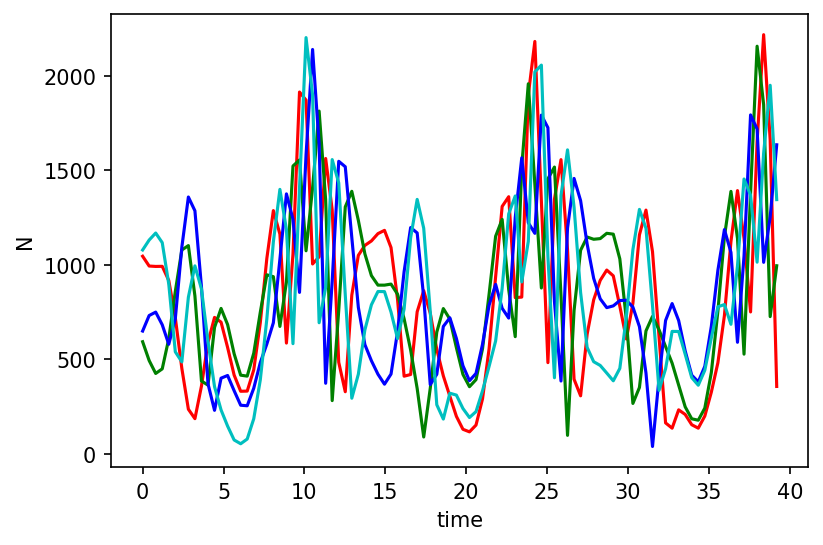

In [ ]:
plt.xlabel("time")
plt.ylabel("N")
N = [   [(N_x[j][i]**2 + N_y[j][i]**2) ** 0.5 for i in range(num-2)] for j in range(n)]
for i in range(n):
  plt.plot(t_s[:-2],N[i], color[i])

##Moment analysis
$\vec{\tau_N} = \vec{r} \times \vec{N} = (r_x \hat{i}+r_y \hat{j}+r_z \hat{k})\times (N_x \hat{i}+N_y \hat{j}+N_z \hat{k})$ \
Here, $N_z = mgcos\alpha$ \
Thus, $\tau_N = (r_y N_z - r_z N_y) \hat{i}+(r_z N_x - N_z r_x) \hat{j}+(r_x N_y - N_x r_y) \hat{k}$ \
Apply lagrange's equation for the coordinate $\theta_3$ \
We get: $\vec{M_{ext}} = [I]_{CM} \cdot \ddot{\theta_3} - \vec{\tau_N}$ \
For the inertia tensor, we need the values of $I_{13}, I_{23}$ and $I_{33}.$ This is because $\ddot{\theta_3}$ is in the z-direction. \
Hence, 
$(M_{ext})_x = I_{13} \cdot \ddot {\theta_3} - \tau_x$ \
$(M_{ext})_y = I_{23} \cdot \ddot {\theta_3} - \tau_y$ and, \
$(M_{ext})_z = I_{33} \cdot \ddot {\theta_3} - \tau_z$

In [ ]:
I_13 = 50
I_23 = 0
I_33 = 45
N_z = M*g*np.cos(alpha*np.pi/180)

def theta3_ddot(t):
  return 3*w1*np.cos(w1*t)

Tau_x = [[0]*(num-2) for i in range(n)]
Tau_y = [[0]*(num-2) for i in range(n)]
Tau_z = [[0]*(num-2) for i in range(n)]

M_x = [[0]*(num-2) for i in range(n)]
M_y = [[0]*(num-2) for i in range(n)]
M_z = [[0]*(num-2) for i in range(n)]

for i in range(n):
  for j in range(num-2):

    Tau_x[i][j] = r_y[0][i][j]*N_z - r_z[0][i][j]*N_y[i][j]
    Tau_y[i][j] = r_z[0][i][j]*N_x[i][j] - r_x[0][i][j]*N_z
    Tau_z[i][j] = r_x[0][i][j]*N_y[i][j] - r_y[0][i][j]*N_x[i][j]

    M_x[i][j] =I_13*theta3_ddot(j*dt) - Tau_x[i][j]
    M_y[i][j] =I_23*theta3_ddot(j*dt) - Tau_y[i][j]
    M_z[i][j] =I_33*theta3_ddot(j*dt) - Tau_z[i][j]

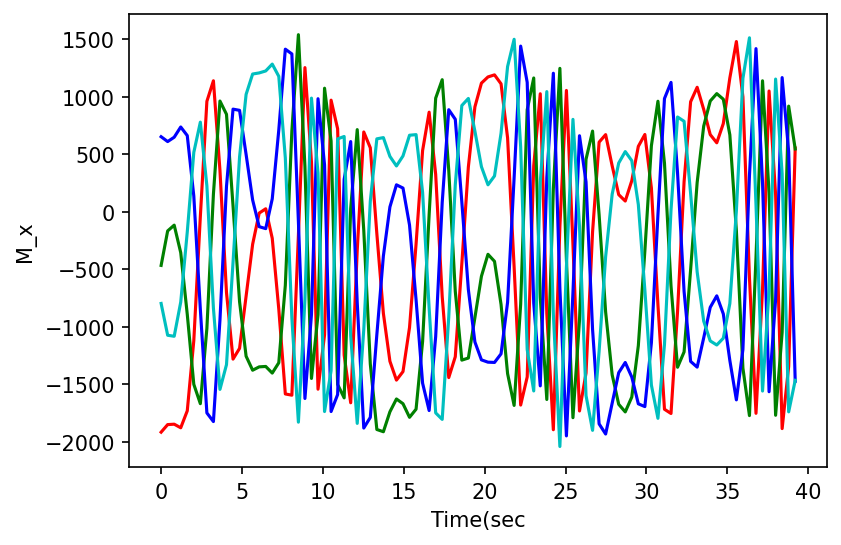

In [ ]:
plt.xlabel("Time(sec")
plt.ylabel("M_x")
for i in range(n):
  plt.plot(t_s[:-2],M_x[i], color[i])

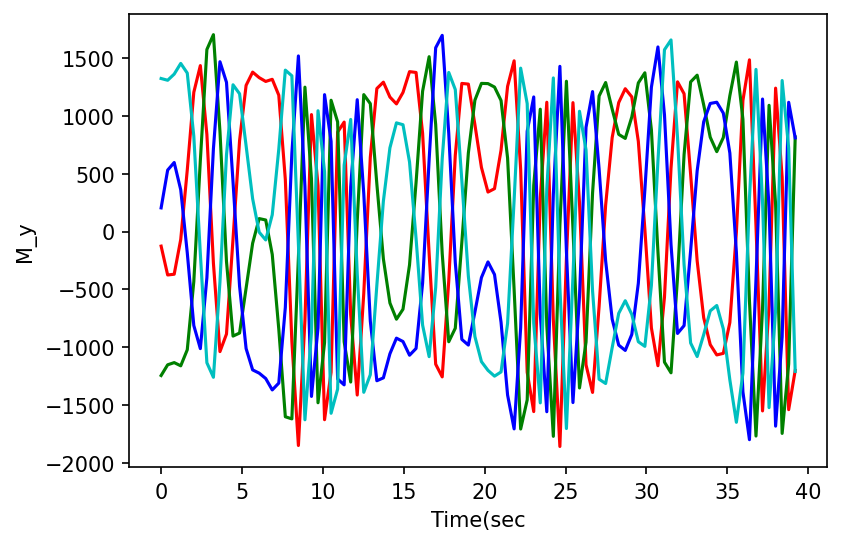

In [ ]:
plt.xlabel("Time(sec")
plt.ylabel("M_y")
for i in range(n):
  plt.plot(t_s[:-2],M_y[i], color[i])

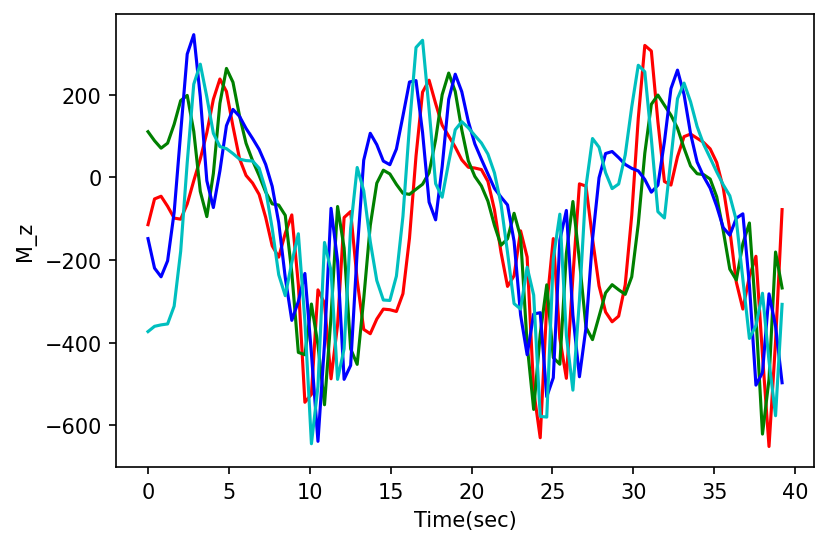

In [ ]:
plt.xlabel("Time(sec)")
plt.ylabel("M_z")
for i in range(n):
  plt.plot(t_s[:-2],M_z[i], color[i])